# Boilerplate

In [1]:
%load_ext autoreload
%autoreload

import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.api as sms
import json
import optuna

from IPython.display import display
from IPython.display import Markdown as md
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

def f():
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    
def nf():
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', 4)
nf()
import warnings
warnings.filterwarnings('ignore')

def dp(df, r = 5, c = None):
    from IPython.display import display
    with pd.option_context('display.max_rows', 4, 'display.max_columns', None):
        display(df)

def fg(w = 6, h = 4, dpi = 120):
    plt.rcParams['figure.figsize'] = (w,h)
    plt.rcParams['figure.dpi'] = dpi
fg()

/Users/vpb/anaconda3/envs/ds/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from libs.pipeline import Pipe
import lightgbm as lgb

In [3]:
df = pd.read_csv("data/UCI_Credit_Card.csv")

df.columns = df.columns.str.lower()

df = df.drop('id', axis = 1)

df = df.rename(columns = {'default.payment.next.month':'target'})

df.to_parquet('data/df_to_feature_selection.parquet', index = False)

In [4]:
for i in range(3,12,1):
    clf = lgb.LGBMClassifier(max_depth = i)
    ma = Pipe(df = df, model = clf, target_var = 'target')
    print(i)
    ma.popin.scores
    ma.oos.scores
    ma.metrics()

3


,accuracy,precision,recall,f1,auc,gini
0,0.83,0.7,0.38,0.49,0.81,0.62


,accuracy,precision,recall,f1,auc,gini
0,0.82,0.66,0.36,0.47,0.77,0.54


4


,accuracy,precision,recall,f1,auc,gini
0,0.83,0.71,0.38,0.5,0.83,0.66


,accuracy,precision,recall,f1,auc,gini
0,0.82,0.69,0.38,0.49,0.79,0.58


5


,accuracy,precision,recall,f1,auc,gini
0,0.84,0.74,0.42,0.53,0.86,0.72


,accuracy,precision,recall,f1,auc,gini
0,0.82,0.68,0.37,0.48,0.78,0.56


6


,accuracy,precision,recall,f1,auc,gini
0,0.84,0.76,0.42,0.55,0.86,0.72


,accuracy,precision,recall,f1,auc,gini
0,0.82,0.67,0.36,0.47,0.78,0.56


7


,accuracy,precision,recall,f1,auc,gini
0,0.85,0.78,0.44,0.56,0.88,0.76


,accuracy,precision,recall,f1,auc,gini
0,0.82,0.66,0.37,0.47,0.77,0.54


8


,accuracy,precision,recall,f1,auc,gini
0,0.85,0.77,0.43,0.55,0.88,0.76


,accuracy,precision,recall,f1,auc,gini
0,0.82,0.69,0.37,0.48,0.79,0.58


9


,accuracy,precision,recall,f1,auc,gini
0,0.84,0.77,0.43,0.55,0.88,0.76


,accuracy,precision,recall,f1,auc,gini
0,0.82,0.66,0.38,0.48,0.79,0.58


10


,accuracy,precision,recall,f1,auc,gini
0,0.85,0.77,0.43,0.55,0.89,0.78


,accuracy,precision,recall,f1,auc,gini
0,0.82,0.66,0.36,0.47,0.78,0.56


11


,accuracy,precision,recall,f1,auc,gini
0,0.85,0.77,0.44,0.56,0.89,0.78


,accuracy,precision,recall,f1,auc,gini
0,0.82,0.68,0.36,0.47,0.77,0.54


In [5]:
init = 3
end = 13
for i in range(init,end,1):
    clf = lgb.LGBMClassifier(max_depth = i)
    ma = Pipe(df = df, model = clf, target_var = 'target')
    oos = ma.oos.scores
    if i == init:
        dfall = oos
        dfover = ma.overfitting
    else:
        dfall = pd.concat([dfall, oos], axis = 0)
        dfover = pd.concat([dfover, ma.overfitting], axis = 0)

In [6]:
dfall['max_depth'] = range(init, end, 1)
dfover['max_depth'] = range(init, end, 1)

In [7]:
plot = pd.melt(dfall, 
                value_vars = ['accuracy','precision','recall','f1','auc','gini'], 
                id_vars = 'max_depth')
over = pd.melt(dfover, 
                value_vars = ['accuracy','precision','recall','f1','auc','gini'], 
                id_vars = 'max_depth')

<AxesSubplot:xlabel='max_depth', ylabel='value'>

Text(0.5, 1.0, 'Diferença entre training e out of sample as max_depths increases in size')

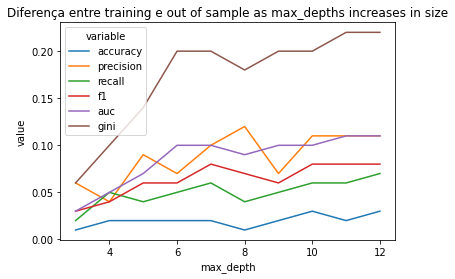

In [8]:
sns.lineplot(x = 'max_depth', 
             y = 'value', 
             hue = 'variable', 
             data = over)
plt.title('Diferença entre training e out of sample as max_depths increases in size')
plt.show()

In [9]:
popin = ma.popin.scores
oos = ma.oos.scores

In [10]:
baseparams = ma.model.get_params()

In [11]:
baseparams

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': 12,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

# Optuna

In [12]:
# split    
from sklearn.model_selection import train_test_split
def split(df, target_var:str, test_size:float=0.3):

    X = df.drop(target_var, axis = 1)
    y = df[target_var]
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size = test_size,
                                                        random_state = 42)
    return X_train, X_test, y_train, y_test

In [13]:
clf = lgb.LGBMClassifier(max_depth = 6)
ma = Pipe(df = df, model = clf, target_var = 'target')
ma.popin.scores
ma.oos.scores
ma.metrics()
ma.overfitting

,accuracy,precision,recall,f1,auc,gini
0,0.84,0.76,0.41,0.54,0.87,0.74


,accuracy,precision,recall,f1,auc,gini
0,0.82,0.68,0.37,0.48,0.79,0.58


,accuracy,precision,recall,f1,auc,gini
0,0.02,0.08,0.04,0.06,0.08,0.16


In [18]:
from libs.tuning import Tuning

In [20]:
tuning = Tuning(df,
                target_var = 'target', 
                n_trials = 2,
                chosen_optimization='f1_score')

[I 2023-03-01 08:02:01,379] A new study created in memory with name: no-name-314db91e-a32a-4b70-84d2-a33cd460868a
[I 2023-03-01 08:02:02,404] Trial 0 finished with value: 0.5 and parameters: {'boosting': 'dart', 'drop_rate': 0.165, 'extra_trees': False, 'device_type': 'cpu', 'colsample_bytree': 1.4, 'n_estimators': 200, 'learning_rate': 0.060000000000000005, 'num_leaves': 5, 'max_depth': 5, 'min_gain_to_split': 0.097, 'min_data_in_leaf': 100, 'min_child_weight': 1e-05, 'lambda_l1': 100, 'lambda_l2': 80, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 6, 'feature_fraction': 0.30000000000000004, 'feature_fraction_bynode': 0.6000000000000001, 'pos_bagging_fraction': 0.4}. Best is trial 0 with value: 0.5.


[LightGBM] [Warning] Unknown parameter: ming_gain_to_split
[LightGBM] [Warning] bagging_freq is set=16, subsample_freq=0 will be ignored. Current value: bagging_freq=16
[LightGBM] [Warning] lambda_l1 is set=60, reg_alpha=0.0 will be ignored. Current value: lambda_l1=60
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.4 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] lambda_l2 is set=60, reg_lambda=0.0 will be ignored. Current value: lambda_l2=60
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart


[I 2023-03-01 08:02:02,918] Trial 1 finished with value: 0.01 and parameters: {'boosting': 'dart', 'drop_rate': 0.155, 'extra_trees': True, 'device_type': 'cpu', 'colsample_bytree': 1.4, 'n_estimators': 190, 'learning_rate': 0.12, 'num_leaves': 35, 'max_depth': 3, 'min_gain_to_split': 0.082, 'min_data_in_leaf': 50, 'min_child_weight': 0.00091, 'lambda_l1': 60, 'lambda_l2': 60, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 16, 'feature_fraction': 0.4, 'feature_fraction_bynode': 0.5, 'pos_bagging_fraction': 0.5}. Best is trial 0 with value: 0.5.


In [16]:
bestparams = tuning.study.best_params

In [17]:
bestparams

{'boosting': 'dart',
 'drop_rate': 0.135,
 'extra_trees': False,
 'device_type': 'cpu',
 'colsample_bytree': 1.4,
 'n_estimators': 160,
 'learning_rate': 0.05,
 'num_leaves': 10,
 'max_depth': 9,
 'min_gain_to_split': 0.012,
 'min_data_in_leaf': 130,
 'min_child_weight': 0.00041000000000000005,
 'lambda_l1': 10,
 'lambda_l2': 60,
 'bagging_fraction': 0.30000000000000004,
 'bagging_freq': 6,
 'feature_fraction': 0.30000000000000004,
 'feature_fraction_bynode': 0.45,
 'pos_bagging_fraction': 0.5}

In [25]:
baseparams = ma.model.get_params()

In [26]:
best = lgb.LGBMClassifier().set_params(**bestparams)

mbest = Pipe(df, target_var = 'target', model = best)

mbest.popin.scores

mbest.oos.scores

,accuracy,precision,recall,f1,auc,gini
0,0.82,0.66,0.41,0.51,0.79,0.58


,accuracy,precision,recall,f1,auc,gini
0,0.82,0.64,0.4,0.49,0.78,0.56


In [ ]:
base = lgb.LGBMClassifier().set_params(**baseparams)

mbase = Pipe(df, target_var = 'target', model = base)

mbase.popin.scores

mbase.oos.scores

In [ ]:
optuna.visualization.plot_param_importances(tuning.study)

In [ ]:
optuna.visualization.plot_optimization_history(tuning.study)

In [ ]:
optuna.visualization.plot_intermediate_values(tuning.study)

In [ ]:
optuna.visualization.plot_slice(tuning.study)

In [ ]:
optuna.visualization.plot_contour(tuning.study)

In [ ]:
optuna.visualization.plot_parallel_coordinate(tuning.study)